In [25]:
types = ["age", "edu", "incom", "job", "sex"]
columns = ["年齡層", "教育程度類別", "年收入", "職業類別", "性別"]

for item, column in zip(types, columns):
    with open(f"six_{item}_2023.csv", "r", encoding="utf-8") as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            __insert_data(
                conn,
                tablename=item,
                values=[
                    row["年"],
                    row["月"],
                    row["地區"],
                    row["產業別"],
                    row[f"{columns}"],
                    row["信用卡交易筆數"],
                    row["信用卡交易金額"],
                ],
            )

age
年齡層
edu
教育程度類別
incom
年收入
job
職業類別
sex
性別


[6.50251624e+12 6.50251624e+12 6.50251624e+12 ... 6.56814910e+12
 6.56814910e+12 6.56814910e+12]


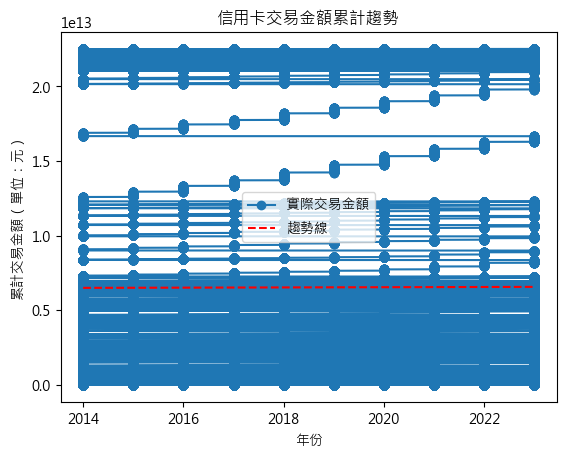

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 將十年的信用卡交易金額相加
df['累計交易金額'] = df['信用卡交易金額[新台幣]'].cumsum()

# 準備X（年份）和y（累計交易金額）的資料
X = np.array(df['年']).reshape(-1, 1)
y = np.array(df['累計交易金額'])

# 建立線性回歸模型
model = LinearRegression()

# 適應模型
model.fit(X, y)

# 生成預測
y_pred = model.predict(X)
print(y_pred)

# 繪製折線圖和趨勢線
plt.plot(df['年'], df['累計交易金額'], marker='o', linestyle='-', label='實際交易金額')
plt.plot(df['年'], y_pred, color='red', linestyle='--', label='趨勢線')

# 添加標籤
plt.title('信用卡交易金額累計趨勢')
plt.xlabel('年份')
plt.ylabel('累計交易金額（單位：元）')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()


In [8]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據地區分組
grouped_df = df.groupby('地區')

# 計算每個地區的「信用卡金額」的年成長率
for name, group in grouped_df:
    group['年成長率'] = (group['信用卡交易金額[新台幣]'].pct_change() * 100).fillna(0)

    # 可以將結果存儲到新的DataFrame或繪製圖表
    print(f"地區: {name}")
    print(group[['年', '月', '信用卡交易金額[新台幣]', '年成長率']])
    print("\n")


地區: 南投縣
           年  月  信用卡交易金額[新台幣]         年成長率
252252  2014  1         26821     0.000000
252253  2014  1       1578313  5784.616532
252254  2014  1       5520306   249.759902
252255  2014  1      10178812    84.388547
252256  2014  1      14568166    43.122459
...      ... ..           ...          ...
275179  2023  9      14302363   -13.813628
275180  2023  9       6905546   -51.717447
275181  2023  9       3406577   -50.668970
275182  2023  9        724855   -78.721896
275183  2023  9        387688   -46.515096

[22932 rows x 4 columns]


地區: 嘉義市
          年  月  信用卡交易金額[新台幣]         年成長率
22932  2014  1         93082     0.000000
22933  2014  1       2738338  2841.855568
22934  2014  1       8092427   195.523306
22935  2014  1      14934827    84.553126
22936  2014  1      21118032    41.401250
...     ... ..           ...          ...
45859  2023  9       7799572   -31.054226
45860  2023  9       4713413   -39.568312
45861  2023  9       1897742   -59.737413
45862  2023  9      

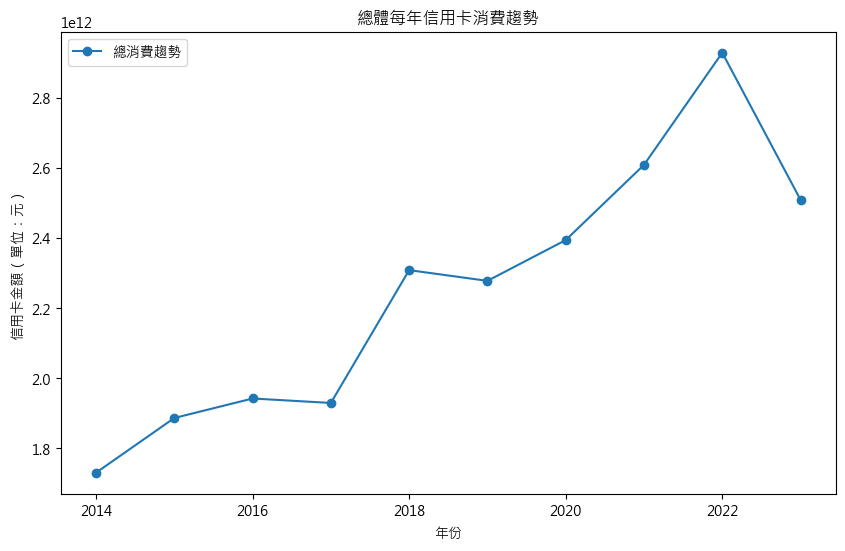

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製整體每年的信用卡消費趨勢
plt.figure(figsize=(10, 6))
plt.plot(total_by_year['年'], total_by_year['信用卡交易金額[新台幣]'], marker='o', linestyle='-', label='總消費趨勢')

# 添加標籤
plt.title('總體每年信用卡消費趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額（單位：元）')
plt.legend()



# 顯示圖表
plt.show()


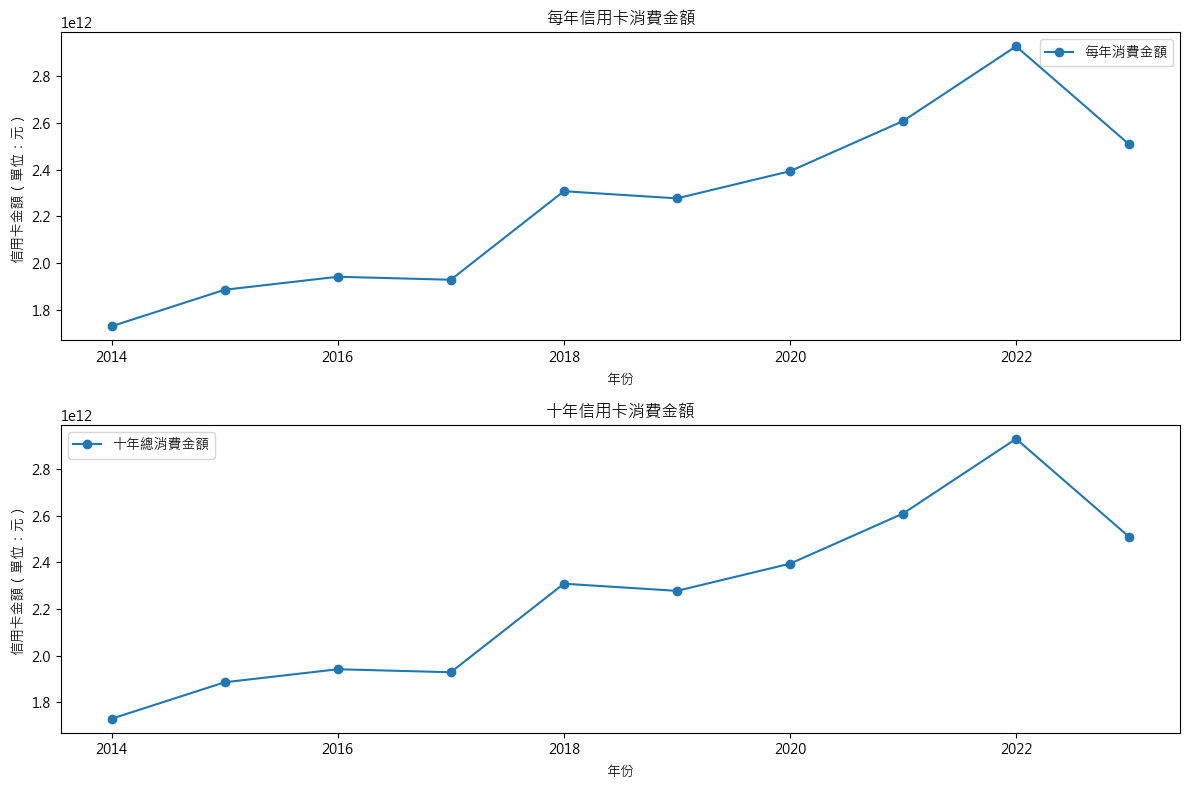

c:\GitHub\ctest\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values
posx and posy should be finite values


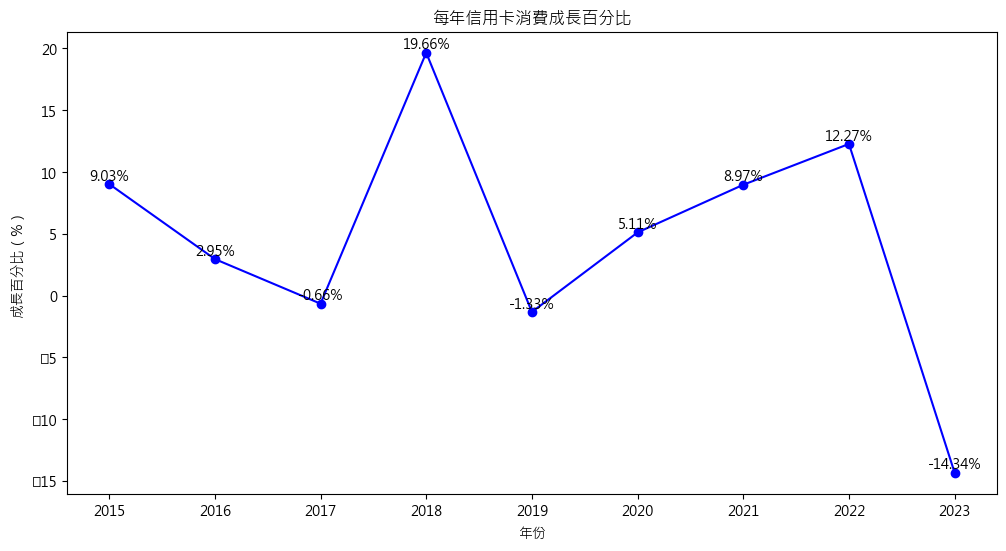

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# 將每年的成長百分比列出
plt.figure(figsize=(12, 6))
plt.plot(total_by_year['年'], total_by_year['成長百分比'], marker='o', linestyle='-', color='blue')
plt.title('每年信用卡消費成長百分比')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')

# 顯示成長百分比數值
for i, value in enumerate(total_by_year['成長百分比']):
    plt.text(total_by_year['年'][i], value, f'{value:.2f}%', ha='center', va='bottom')

# 顯示圖表
plt.show()
